# 7. Grundbegriffe ARIMA

## 7.1 Autoregression (AR)

In [76]:
import pandas as pd
import numpy as np

X = np.random.randn(500)
df = pd.DataFrame()
t = list(range(0,len(X)))
df['t'] = t
df['X'] = X
df

,t,X
0,0,-1.397335
1,1,1.409542
2,2,1.445866
3,3,1.769686
4,4,-0.223010
...,...,...
495,495,1.796232
496,496,-0.988476
497,497,0.974699
498,498,-0.082304


In [77]:
import plotly.express as px
fig= px.line(df, x='t', y= 'X')
fig.show()

#### Einführung einer "künstlichen" Autokorrelation

In [78]:
for i in range(1,len(X)):
    X[i] = 0.3*X[i-2] + 0.5*X[i-1] + X[i]

df1 = pd.DataFrame()
df1['t'] = t
df1['X'] = X
df1

,t,X
0,0,-1.397335
1,1,0.882890
2,2,1.468111
3,3,2.768609
4,4,1.601727
...,...,...
495,495,1.209451
496,496,-0.570942
497,497,1.052063
498,498,0.272445


In [79]:
fig= px.line(df1, x='t', y= 'X')
fig.show()

In [80]:
from statsmodels.tsa.ar_model import AutoReg
model = AutoReg(X, lags = 2, trend = 'n')
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                      y   No. Observations:                  500
Model:                     AutoReg(2)   Log Likelihood                -688.535
Method:               Conditional MLE   S.D. of innovations              0.964
Date:                Mon, 05 Dec 2022   AIC                           1383.071
Time:                        12:07:33   BIC                           1395.703
Sample:                             2   HQIC                          1388.028
                                  500                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
y.L1           0.5695      0.044     13.005      0.000       0.484       0.655
y.L2           0.1983      0.044      4.533      0.000       0.113       0.284
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2296           +0.0000j            1.2296            0.0000
AR.2           -4.1017           +0.0000j            4.1017            0.5000
-----------------------------------------------------------------------------
"""

##### Autokorrelation aufdecken

D:\Lehre\Zeitreihen_Analyse_und_Prädiktion\Code\venv\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



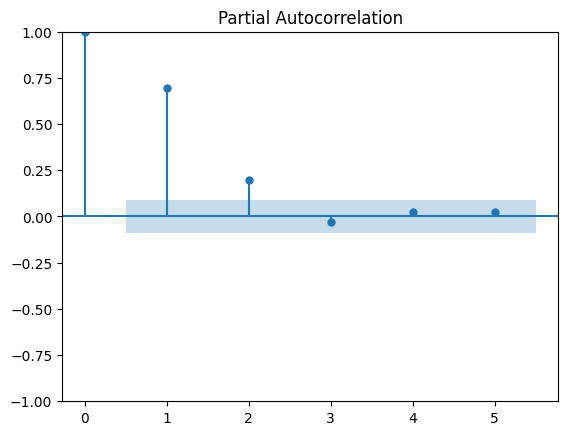

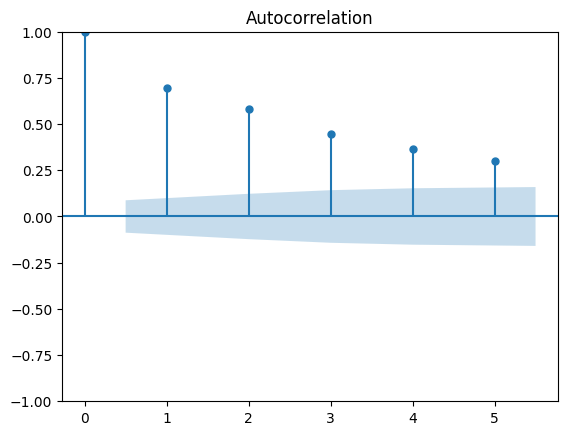

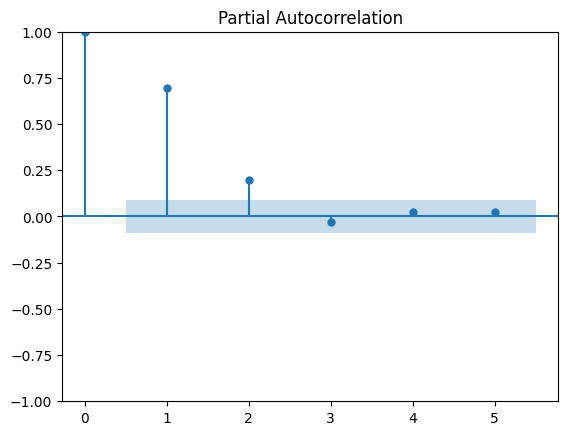

In [81]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(X, lags=5)
plot_pacf(X, lags = 5)

#### Augemnted Dickey-Fuller Test

In [83]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(X)
print('Testergebnis','P-Wert')
result[0], result[1]

Testergebnis P-Wert


(-7.117149373098204, 3.8047831325222377e-10)